In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import math

from matplotlib import path
import collections

In [2]:
class robot:
    def __init__(self, start, d, theta):
        self.x = start[0];
        self.y = start[1];
        self.deltD = d;
        self.deltadegree = theta;
        self.curtheta = 0;
        self.direction = 1
        
    def Attempmove(self):
        newx = self.x + self.deltD * math.cos( np.radians(self.curtheta) )
        newy = self.y + self.deltD * math.sin(  np.radians(self.curtheta) )
        
        return newx, newy
        
    def move(self):
        self.x += self.deltD * math.cos( np.radians(self.curtheta) )
        self.y += self.deltD * math.sin(  np.radians(self.curtheta) )
    
    def rotate(self, cw = 1):
        self.direction *= cw
        if self.direction == 1:
            self.curtheta += self.deltadegree
        else:
            self.curtheta -= self.deltadegree
        self.curtheta = (self.curtheta + 360) % 360
        

In [3]:
class Bug2:
    def __init__(self, d, theta, start, end, obstacles):
        self.start = start
        self.end = end
        self.obstacles = obstacles
        self.path = [start]
        self.goalDir =  0
        self.poly = path.Path(obstacles)
        
    def getOrientation(self, start, end):
        a = ( end[1] - start[1] ) /  ( end[0] - start[0] ) 
        b = end[1] - a * end[0];
        return [a, b]
    
    def getintersection(self, directionList):
        
        intersection = []
        for param, limit1, limit2 in directionList:
            x = (- self.goalDir[1] + param[1]) / (self.goalDir[0] - param[0])
            y = self.goalDir[0] * x + self.goalDir[1]
            if min(limit1[0], limit2[0]) <= x <= max(limit1[0], limit2[0]) and min(limit1[1], limit2[1]) <= y <= max(limit1[1], limit2[1]):
                intersection.append([x, y])
                
        for i in range(len(directionList)):
            if i == 0:
                continue;
            prev = [ directionList[i-1][2][0] - directionList[i-1][1][0], directionList[i-1][2][1] - directionList[i-1][1][1]]
            cur = [ directionList[i][2][0] - directionList[i][1][0], directionList[i][2][1] - directionList[i][1][1]]
            
            x1, y1, x2, y2 = prev[0], prev[1], cur[0], cur[1]
            crossProduct = x1 * y2 - x2 * y1;
            if crossProduct < 0:
                intersection.append(directionList[i][1])
            
        intersection.sort()
        return intersection
    
    def checkCollision(self, point):

        return self.poly.contains_points( [point], radius = 0.01)[0]
    
    def getdistance(self, point, robot):
        return math.sqrt( pow(robot.x - point[0], 2) + pow(robot.y - point[1], 2))
    
    def solve(self, Robot):
        
        directionList = []
        self.goalDir = self.getOrientation(self.start, self.end)
        Robot.curtheta = math.degrees( math.atan( (self.end[1] - self.start[1]) / (self.end[0] - self.start[0]) ) )
        reset = math.degrees( math.atan( (self.end[1] - self.start[1]) / (self.end[0] - self.start[0]) ) )
        for i in range(1, len(self.obstacles)):
            directionList.append( [self.getOrientation(self.obstacles[i-1] , self.obstacles[i]) , self.obstacles[i-1], self.obstacles[i]])
        
        
        intersection = self.getintersection(directionList)
        intersection.append(self.end)
        q = collections.deque(intersection)
        while(len(q)):
            tx, ty = q.popleft()
            
            if(tx == self.end[0] and ty == self.end[1] and self.getdistance([tx, ty], Robot) <= 0.05): #need change
                self.path.append(end)
                break
            
            reset = math.degrees( math.atan( ( ty - Robot.y ) / (tx - Robot.x) ) )
            while self.getdistance([tx, ty], Robot) > 0.1:
                nx, ny = Robot.Attempmove()
                if not self.checkCollision([nx, ny]):
                    Robot.move()
                    self.path.append([Robot.x, Robot.y])
                    Robot.curtheta = math.degrees( math.atan( ( ty - Robot.y ) / (tx - Robot.x) ) )
                else:
                    Robot.rotate()
               
        return
                
                
            

In [4]:
def plot(start, end, obstacles, bug=None):
    pts = np.array(obstacles)
    p = Polygon(pts, closed=False)
    ax = plt.gca()
    ax.add_patch(p)
    ax.set_xlim(-2,6)
    ax.set_ylim(-2,6)
    x = start[0]
    y = start[1]
    plt.scatter(x, y, c='coral', s = 50)
    X = end[0]
    Y = end[1]
    plt.scatter(X, Y, c='lightblue', s = 50)
    
    if bug != None:
        for i in range(len(bug.path)):
               plt.scatter(bug.path[i][0], bug.path[i][1], c='orange', s = 5)

    plt.show()

In [5]:
start = [0,0]
obstacles = [[1,0],[3,1],[1.6,2.5],[1.4,4],[1,0]]
end = [3,2]
d = 0.03
theta = 10

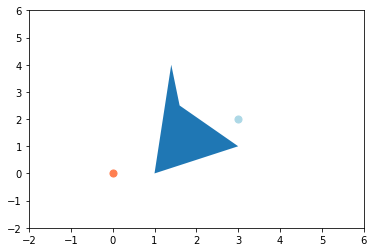

In [6]:
plot(start, end, obstacles)

In [7]:
Robot = robot(start, d, theta)

In [8]:
bug = Bug2(d, theta, start, end, obstacles)

In [9]:
bug.solve(Robot)

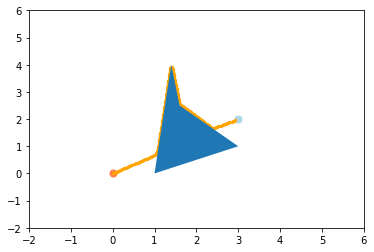

In [10]:
plot(start, end, obstacles, bug)

In [11]:
start = [0,0]
obstacles = [[1,0],[3,1],[2, 2],[1,0]]
end = [3,2]
d = 0.03
theta = 10

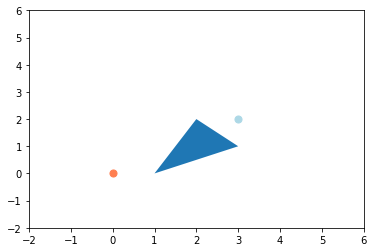

In [12]:
plot(start, end, obstacles)

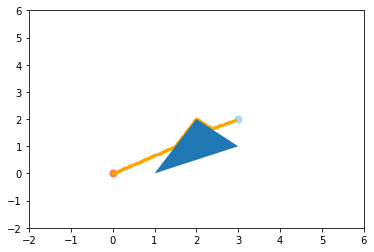

In [13]:
Robot = robot(start, d, theta)
bug = Bug2(d, theta, start, end, obstacles)
bug.solve(Robot)
plot(start, end, obstacles, bug)

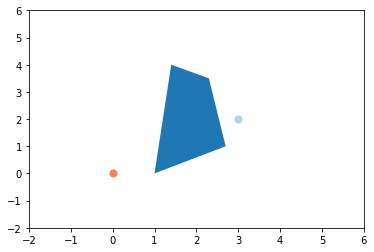

In [14]:
start = [0,0]
obstacles = [[1,0],[2.7,1],[2.3,3.5],[1.4,4],[1,0]]
end = [3,2]
d = 0.03
theta = 10
plot(start, end, obstacles)

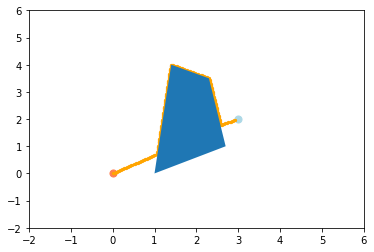

In [15]:
Robot = robot(start, d, theta)
bug = Bug2(d, theta, start, end, obstacles)
bug.solve(Robot)
plot(start, end, obstacles, bug)

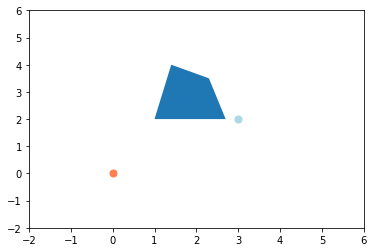

In [16]:
start = [0,0]
obstacles = [[1,2],[2.7,2],[2.3,3.5],[1.4,4],[1,2]]
end = [3,2]
d = 0.03
theta = 10
plot(start, end, obstacles)

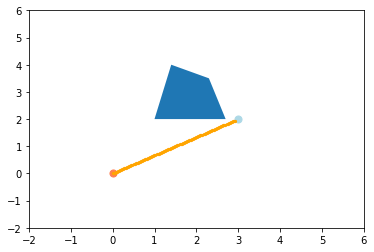

In [17]:
Robot = robot(start, d, theta)
bug = Bug2(d, theta, start, end, obstacles)
bug.solve(Robot)
plot(start, end, obstacles, bug)